In [3]:
%%time
# just in-case installs
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

                                              0.0/8.1 MB ? eta -:--:--
                                              0.2/8.1 MB 3.1 MB/s eta 0:00:03
     -                                        0.4/8.1 MB 4.1 MB/s eta 0:00:02
     ----                                     0.9/8.1 MB 6.2 MB/s eta 0:00:02
     ------                                   1.4/8.1 MB 7.4 MB/s eta 0:00:01
     ---------                                1.9/8.1 MB 8.1 MB/s eta 0:00:01
     ------------                             2.4/8.1 MB 8.7 MB/s eta 0:00:01
     --------------                           2.9/8.1 MB 8.9 MB/s eta 0:00:01
     -----------------                        3.5/8.1 MB 9.2 MB/s eta 0:00:01
     -------------------                      4.0/8.1 MB 9.5 MB/s eta 0:00:01
     ---------------------                    4.3/8.1 MB 9.8 MB/s eta 0:00:01
     -------------------------                5.1/8.1 MB 9.9 MB/s eta 0:00:01
     ---------------------------              5.6/8.1 MB 10.0 MB/s eta 

In [4]:
%%time
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from warnings import filterwarnings
filterwarnings("ignore")

CPU times: total: 938 ms
Wall time: 4.61 s


In [6]:
#Loading the dataset
#%%time
df=pd.read_csv('mcdonalds.csv')
df.head(20)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Agglo_Cluster,GMM_Cluster,KMeans_Cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female,2,1,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female,2,1,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male,0,1,0
5,1,1,0,1,0,1,1,1,0,0,0,2,55,Every three months,Male,2,1,1
6,1,1,1,1,0,1,0,1,1,1,0,2,56,Every three months,Female,2,1,1
7,1,1,0,1,1,1,1,1,0,0,0,5,23,Once a week,Female,2,1,1
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,Once a year,Male,0,0,0
9,1,1,0,1,1,1,0,1,1,0,0,1,32,Every three months,Female,2,1,1


Checking the datatype and missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
 15  Agglo_Cluster   1453 non-null   int64 
 16  GMM_Cluster     1453 non-null   int64 
 17  KMeans_Cluster  1453 non-null   int64 
dtypes: int64

**Info**
- There is 1 numerical column and 13 categoriacal column according to info.

In [8]:
#Getting the value counts of 'Like'
df['Like'].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [9]:
#Getting the value counts of 'Age'
df['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [10]:
#Getting the value counts of 'VisitFrequency'
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

Columns "Like" and "Age" are having numerical features and "VisitFrequency" is having multiclass features.

In [11]:
#Getting the value counts of 'Gender'
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

There are 788 females and 665 males present.

## Exploratory Data Analysis

                   yummy  convenient     spicy  fattening    greasy      fast  \
yummy           1.000000    0.253807  0.008742  -0.087027 -0.151853  0.106836   
convenient      0.253807    1.000000  0.028928   0.036451 -0.106948  0.243062   
spicy           0.008742    0.028928  1.000000  -0.041322  0.053932  0.020276   
fattening      -0.087027    0.036451 -0.041322   1.000000  0.319283  0.045600   
greasy         -0.151853   -0.106948  0.053932   0.319283  1.000000 -0.058212   
fast            0.106836    0.243062  0.020276   0.045600 -0.058212  1.000000   
cheap           0.105036    0.151574  0.017203  -0.026640 -0.073264  0.252133   
tasty           0.687280    0.289755  0.061154  -0.087561 -0.163536  0.145836   
expensive      -0.061727   -0.163961  0.045979   0.089134  0.147283 -0.201694   
healthy         0.247183    0.099230  0.106252  -0.338401 -0.211186  0.033596   
disgusting     -0.419852   -0.340797  0.032834   0.146054  0.321879 -0.137993   
Like            0.682827    

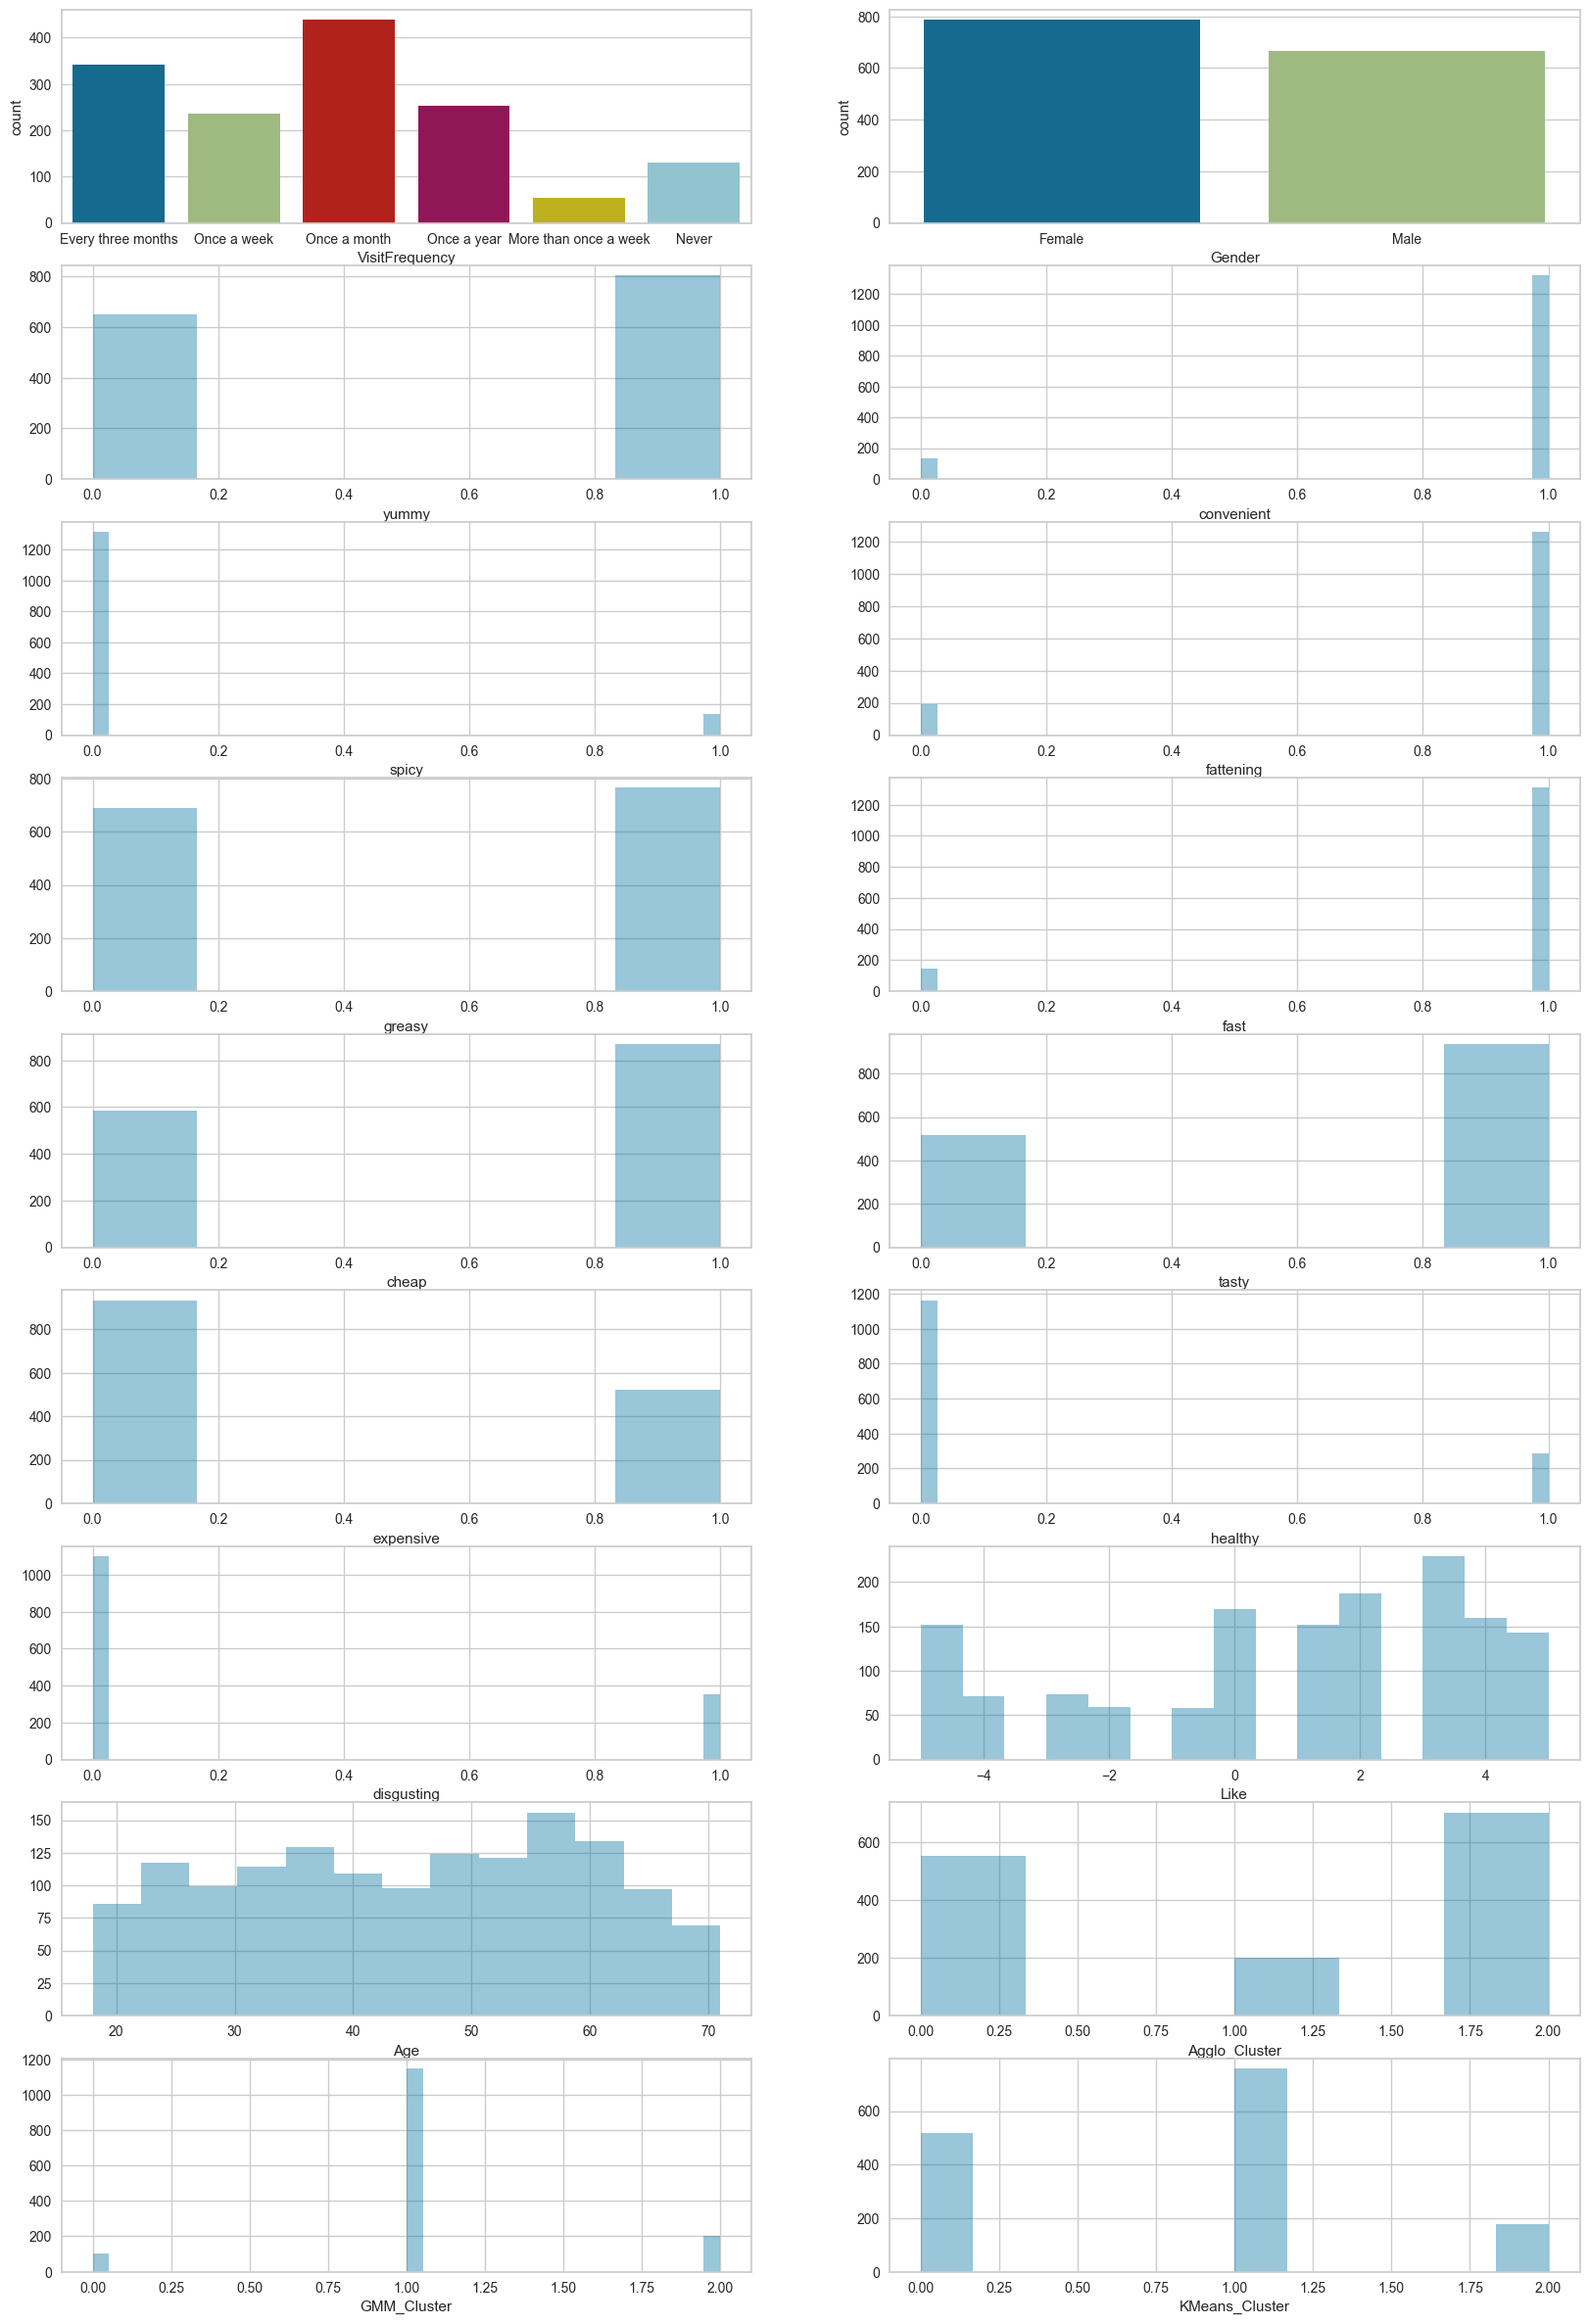

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def EDA(df, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if df[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=df, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(df[i].dropna(), kde=False)  # Exclude missing values

    print(df[con].corr())

# Applying the function on the dataset
EDA(df, (20, 30))


**Inferences**
- 1.There are more females than males.
- 2.Most of the people visit once a month.
- 3.Very less people visit more than once a week.
- 4.Nearly 800 people has told that food is yummy.
- 5.Most people has termed eating at mcdonalds as less expensive,
- 6.Close to 1100 people has termed the food at mcdonalds as not healthy.

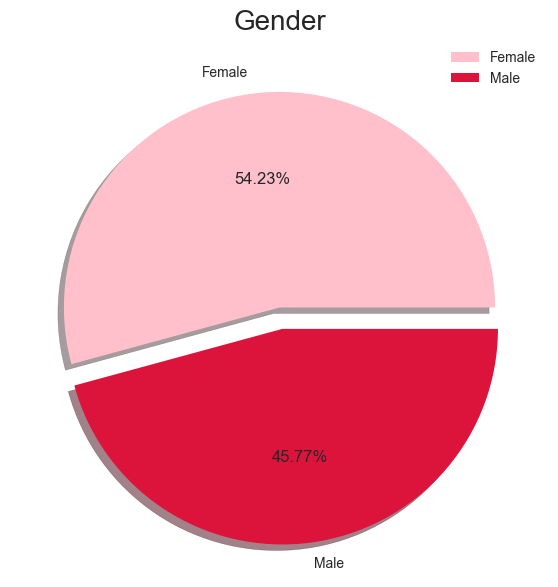

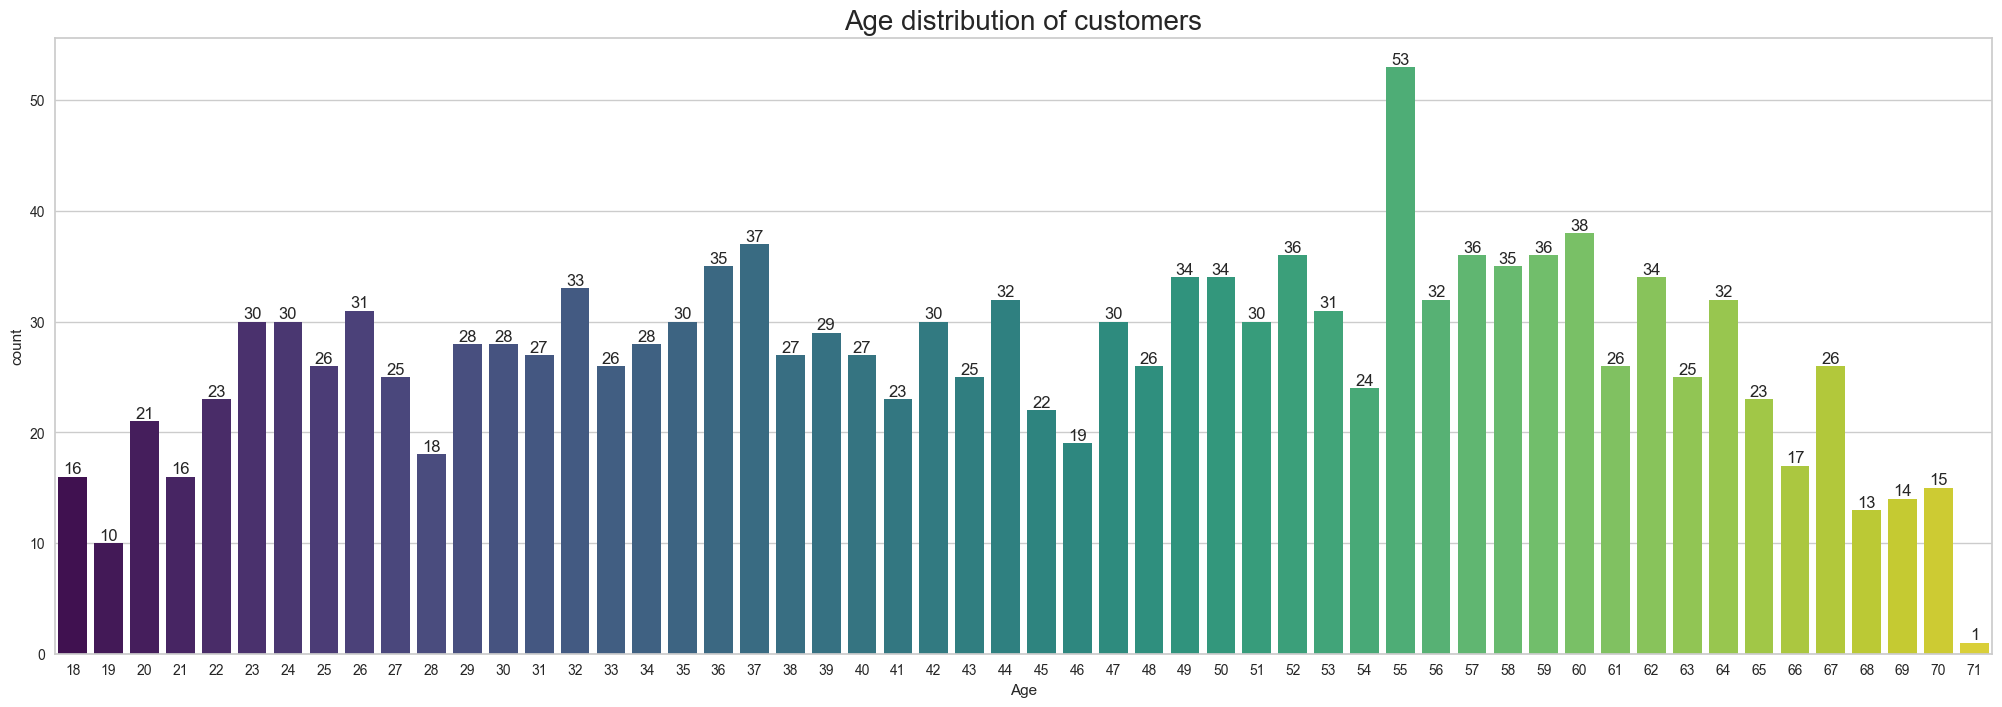

In [13]:
# Demographic segmentation using 'Age' & 'Gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Age'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

- 1.There are 54.23% female and 45.77% male in the dataset.
- 2.There are over 50 people aged 53 that are customer and these are most no. of customers in any age group.
- 3.The least age group of people that prefers eating at mcDonalds is 71.

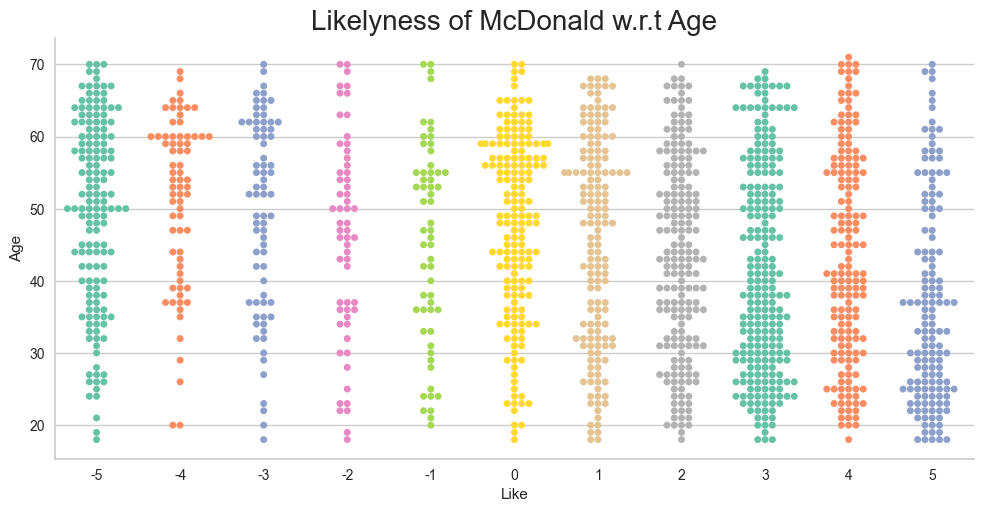

In [14]:
# Pyschographic segmentation using 'Like'

# renaming the category for convinence 
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=df, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

# Data Preprocessing

In [15]:
# columns other than Like, Age, VisitFrequency, Gender are having binary features in the form of Yes/No only.
# so we will perform 'label encoding' for further model building
df1 = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

In [16]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Agglo_Cluster,GMM_Cluster,KMeans_Cluster
0,0,1,0,1,0,1,1,0,1,0,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,1,1
2,0,1,1,1,1,1,0,1,1,1,0,2,1,1
3,1,1,0,1,1,1,1,1,0,0,1,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,0,1,0


### Label Encoding

In [17]:
# LabelEncoder will map 'Yes' to 1 and 'No' to 0
df_encoded = df1.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Agglo_Cluster,GMM_Cluster,KMeans_Cluster
0,0,1,0,1,0,1,1,0,1,0,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,1,1
2,0,1,1,1,1,1,0,1,1,1,0,2,1,1
3,1,1,0,1,1,1,1,1,0,0,1,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,0,1,0


## Using PCA

In [18]:
# applying scaling and PCA
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,1.580997,0.330365,-0.800953,-1.102963,-1.092225,-1.062293,0.234747,-0.549943,0.277335,0.333909,1.549811
1,-0.819389,-1.283334,1.161540,-0.179574,0.045099,0.737434,-0.244485,0.557052,0.180149,0.189583,1.042383
2,-0.522625,0.073663,2.051088,2.955193,-1.750838,-0.729400,-0.471326,-0.924529,1.374850,-1.237023,-0.185474
3,0.364145,-0.810359,-0.743535,0.364131,0.571216,1.335810,-0.910521,0.579494,-1.775001,0.103414,0.267584
4,1.126875,0.037335,-1.910337,0.299905,-0.400700,-0.032169,-1.734263,-1.103518,1.797629,0.107355,0.150622


In [19]:
# variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.30992646, 0.13351351, 0.12034595, 0.0789847 , 0.07129624,
       0.0575772 , 0.05662609, 0.05530489, 0.03885598, 0.02198942,
       0.01955924])

In [20]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.338390,-0.162261,0.285460,-0.018693,0.287206,0.093781,-0.148268,0.039640,-0.260867,0.686928,0.117461
convenient,-0.214188,-0.191013,-0.044887,-0.226276,-0.565902,0.248331,-0.205069,-0.504388,-0.304490,0.031302,-0.183984
spicy,-0.052712,-0.016384,0.113714,0.793773,-0.322329,-0.120935,0.363873,-0.205691,-0.064802,0.060647,0.087303
fattening,0.212911,-0.569647,0.145003,-0.092355,0.013520,-0.134872,-0.024417,-0.259375,0.112214,-0.008033,0.206071
greasy,0.202702,-0.225266,0.118449,0.283732,-0.044851,0.750170,-0.256999,0.209236,0.358664,-0.015715,-0.059578
fast,-0.139677,-0.289823,-0.189278,0.000702,-0.477618,-0.341283,-0.286112,0.624164,0.021754,0.021453,0.043460
cheap,-0.155221,-0.254291,-0.572821,0.179612,0.221796,0.086380,-0.006717,-0.054535,-0.058578,0.059510,0.544356
tasty,-0.352081,-0.187395,0.253813,0.017863,0.214911,0.088587,-0.070085,0.035264,-0.288456,-0.716876,0.186696
expensive,0.163271,0.196531,0.599797,-0.046116,-0.211179,-0.102810,-0.159973,0.079434,-0.013871,0.030300,0.526886


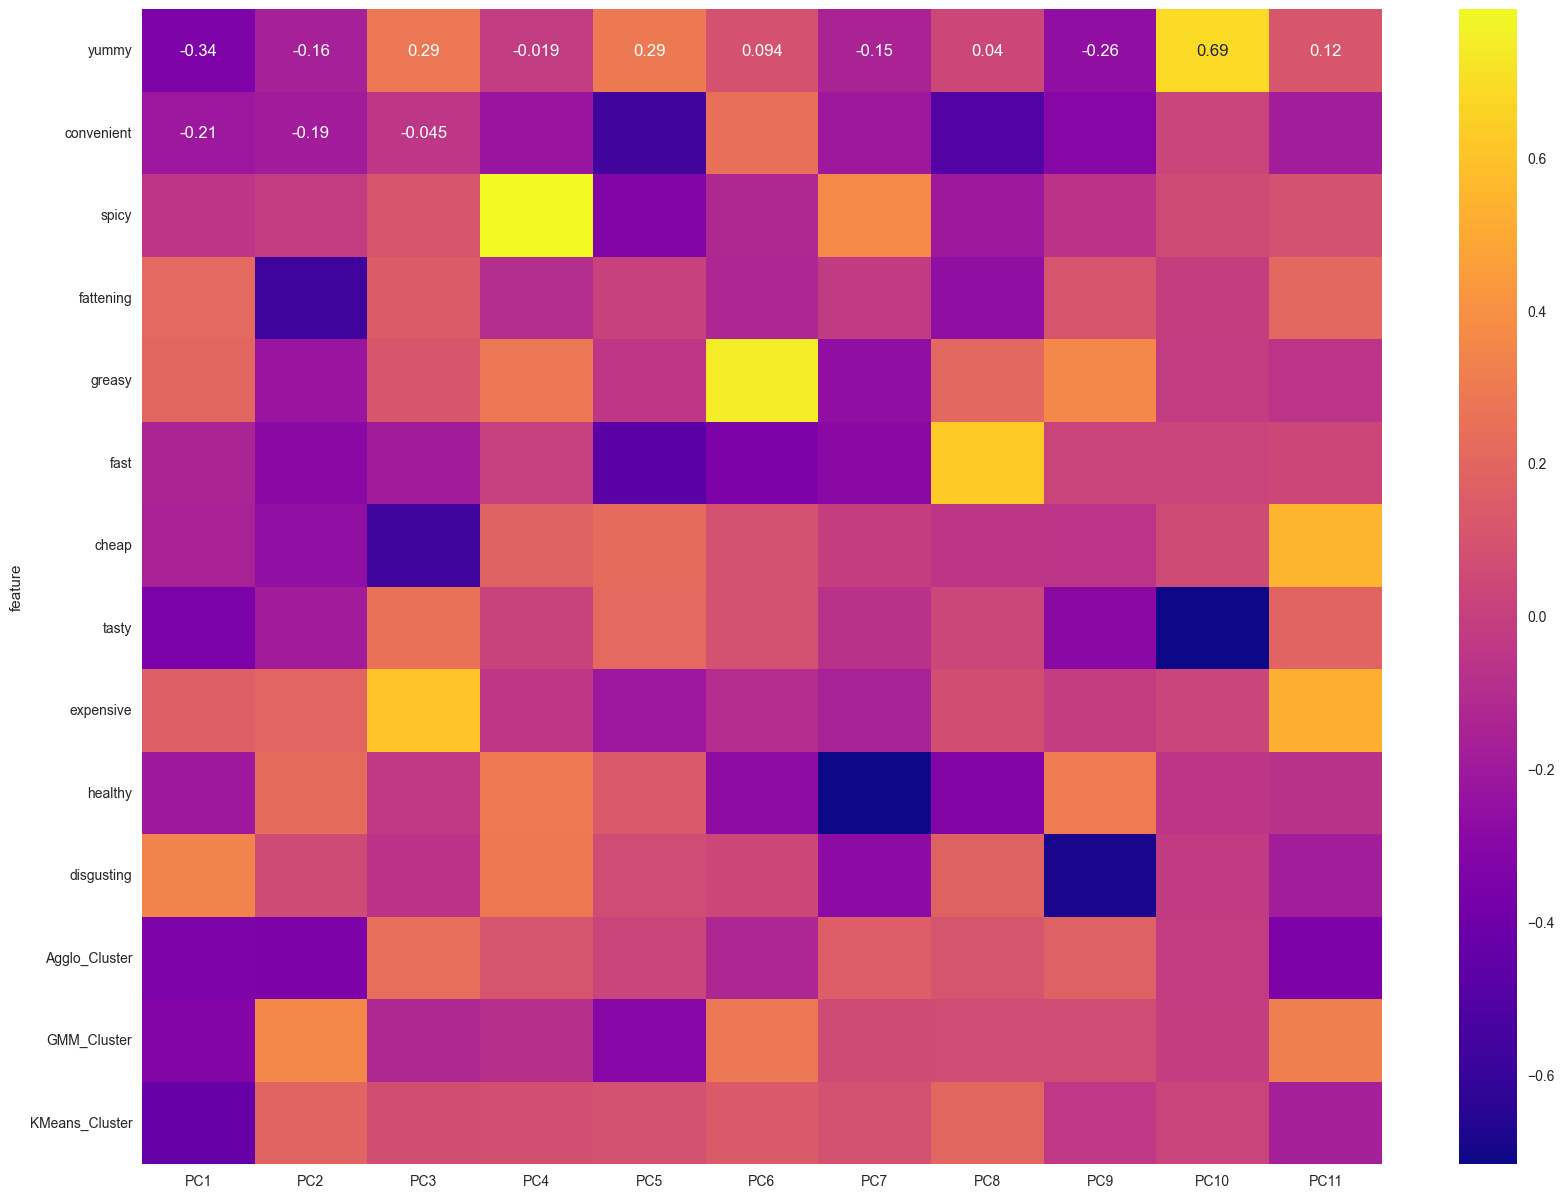

In [21]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='plasma')
plt.show()

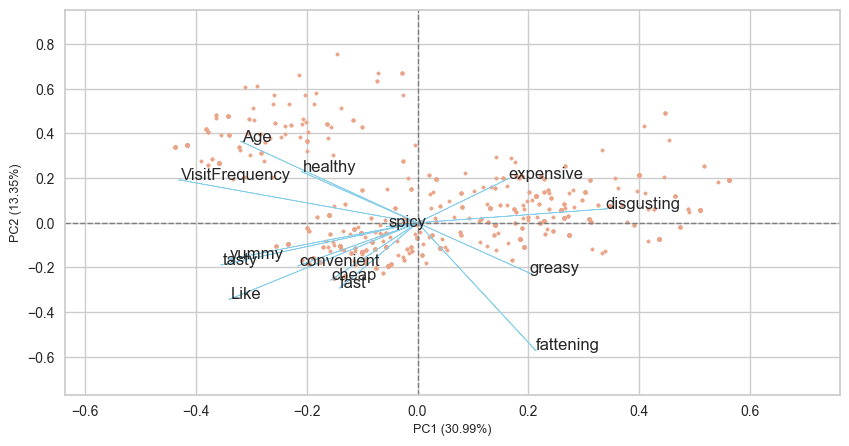

In [22]:
# get PC scores
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

# Applying the Elbow Method

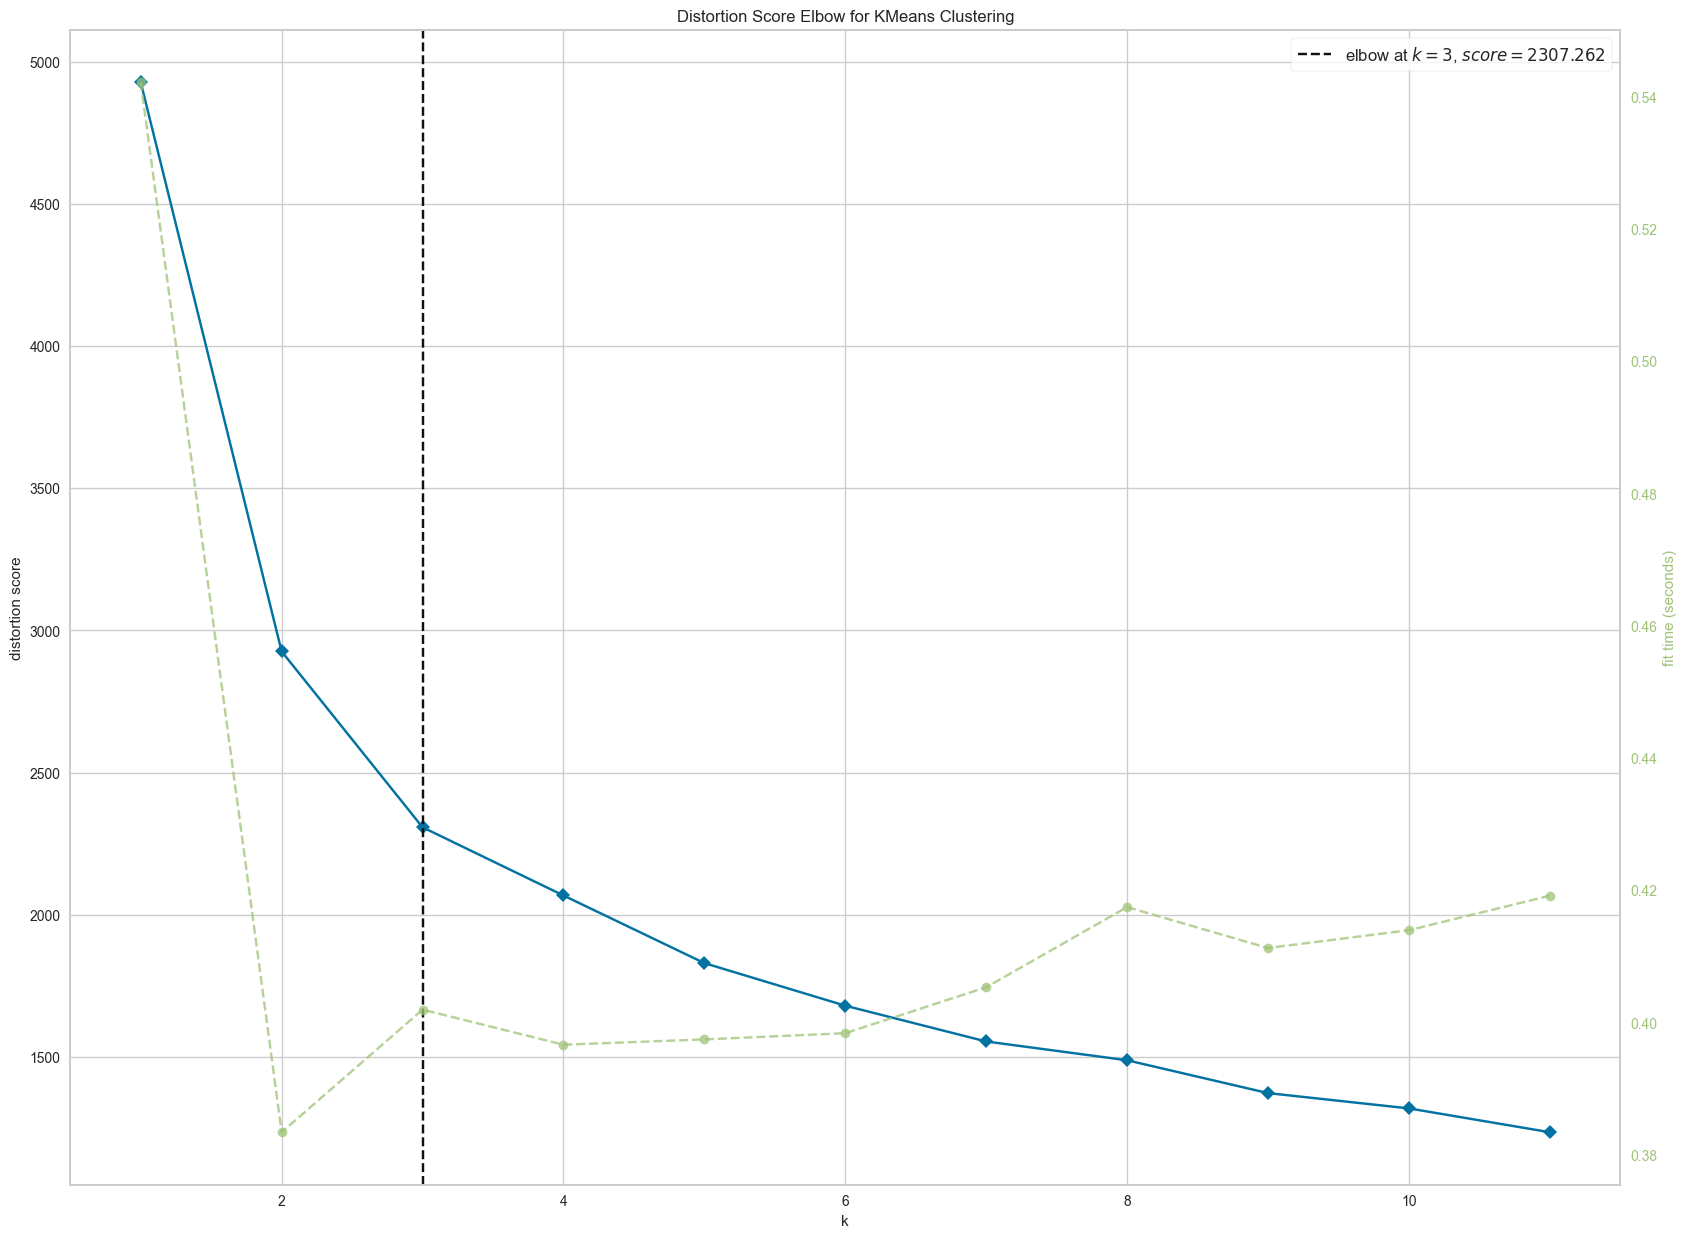

In [23]:
# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

# Applying the K-Means Clustering Algorithm

In [24]:
# k-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [3 1 1 ... 1 2 0]
WCSS: 2068.2950697950687
No. of iterations:  6
Cluster centroids:  [[ 1.83150183e-01  7.17948718e-01  3.29670330e-02  9.63369963e-01
   7.03296703e-01  6.63003663e-01  5.12820513e-02  3.07692308e-01
   9.45054945e-01  6.95970696e-02  6.33699634e-01  6.59340659e-02
   7.50915751e-01  1.13553114e-01]
 [ 8.37606838e-01  9.91452991e-01  1.39601140e-01  1.00000000e+00
   5.12820513e-01  9.95726496e-01  6.72364672e-01  9.33048433e-01
   3.00569801e-01  2.05128205e-01  4.13105413e-02  1.99145299e+00
   1.00854701e+00  9.84330484e-01]
 [ 7.14285714e-01  8.84615385e-01  1.37362637e-01  2.74725275e-02
   9.34065934e-02  8.90109890e-01  6.59340659e-01  7.96703297e-01
   2.25274725e-01  5.60439560e-01 -1.38777878e-16  1.00000000e+00
   2.00000000e+00  1.97802198e+00]
 [ 1.18243243e-01  8.98648649e-01  1.35135135e-02  9.79729730e-01
   6.62162162e-01  8.98648649e-01  8.91891892e-01  1.75675676e-01
   3.37837838e-02  8.10810811e-02  5.10135135e-01  2.36486486e-02
   9.25675

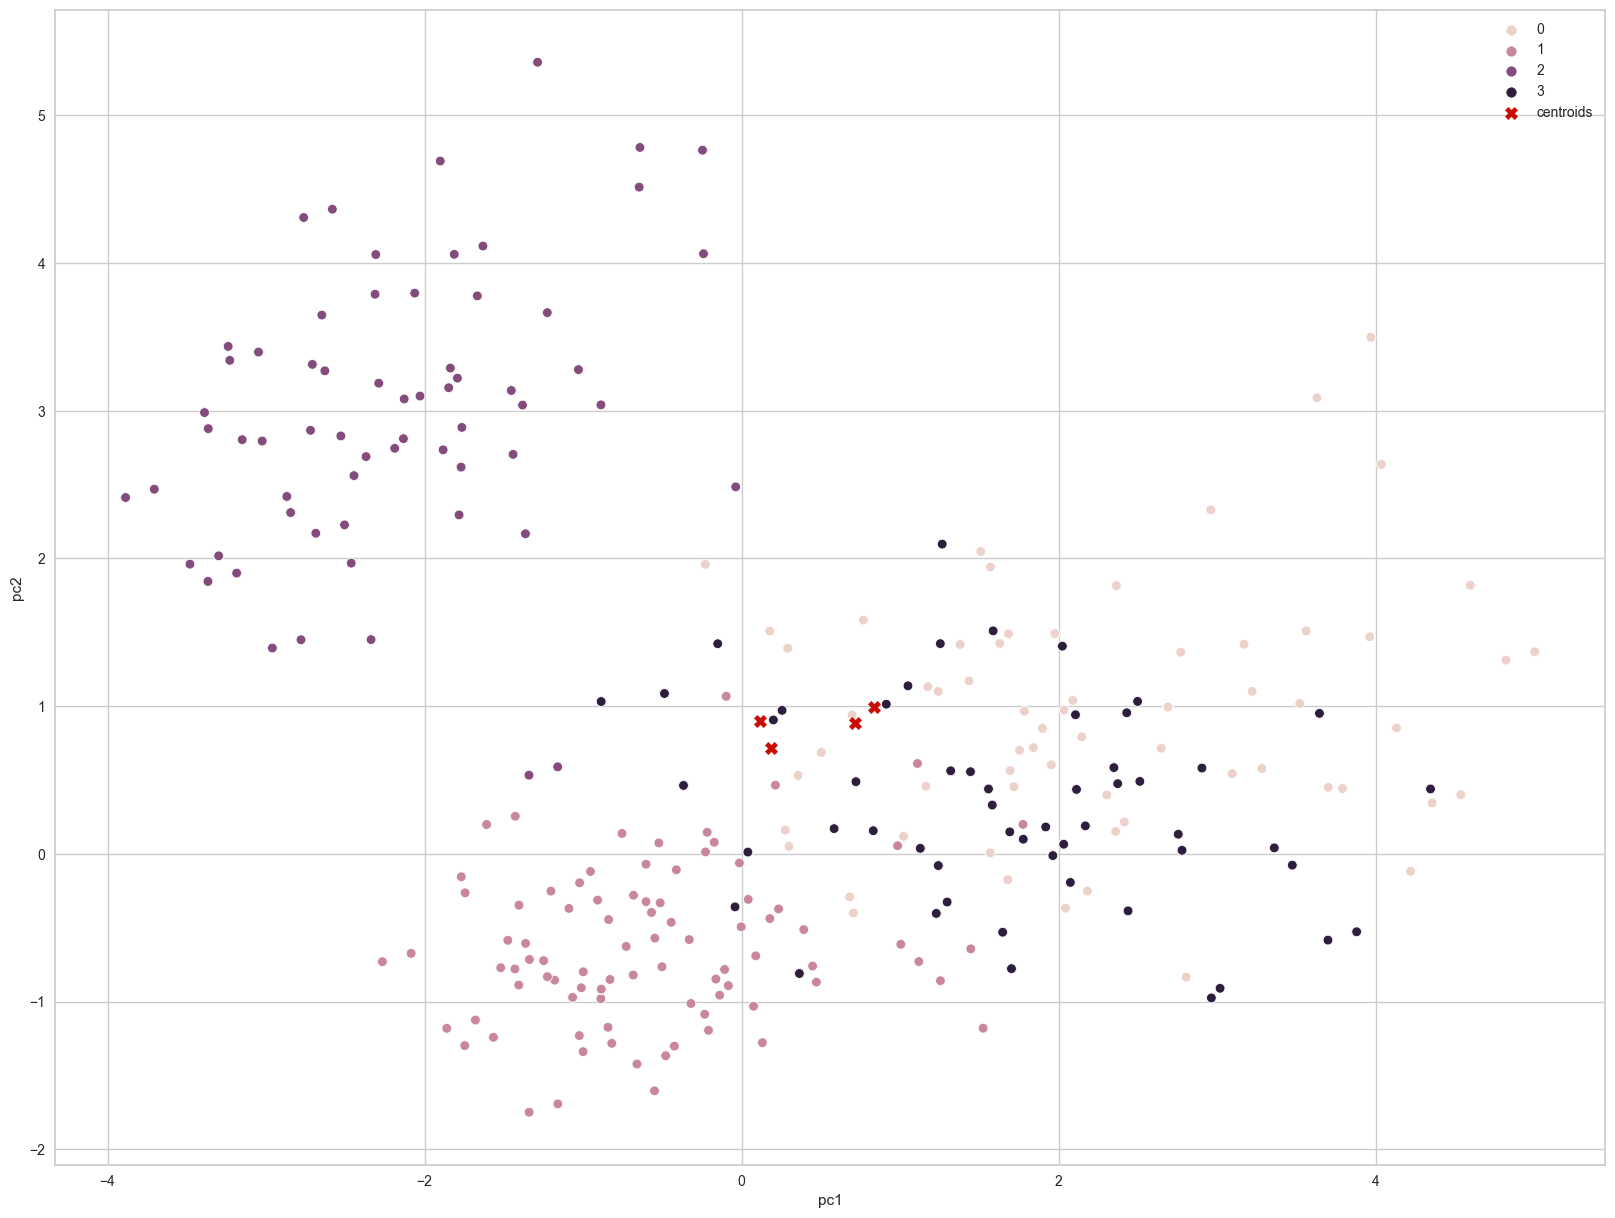

In [25]:
# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## Describing Segments

[-3  2  1  4  5 -5 -2  3  0 -4 -1]


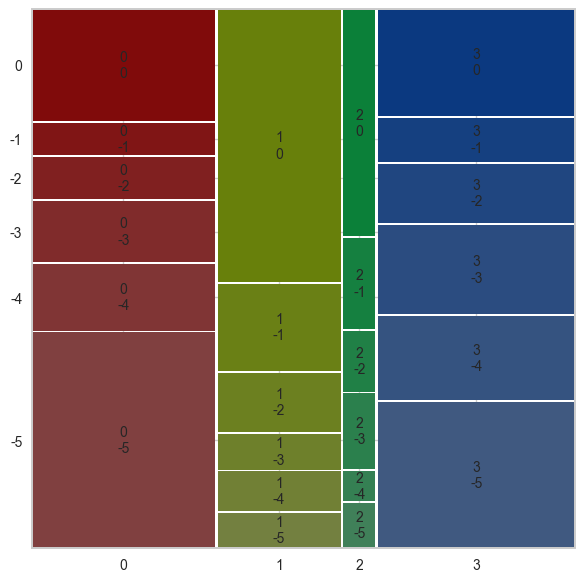

In [27]:
# Check unique values in 'Like' column
print(df['Like'].unique())

# Convert 'Like' column to string if needed
df['Like'] = df['Like'].astype(str)

# Crosstab creation
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Filter available columns
available_columns = [col for col in ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5'] if col in crosstab.columns]
crosstab = crosstab[available_columns]

# Plot mosaic
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
plt.show()


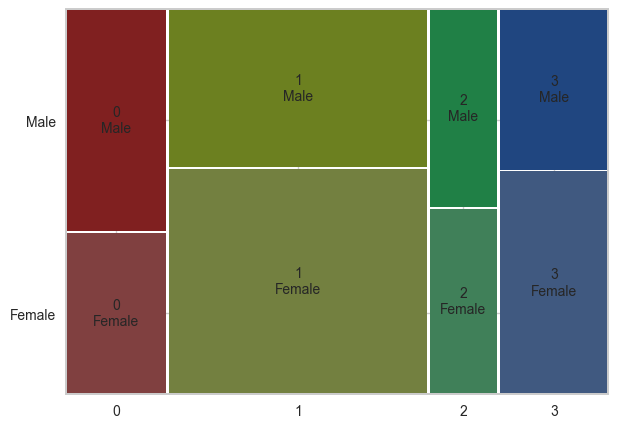

Like,-1,-2,-3,-4,-5,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,12,16,23,25,81,42,26,20,20,4,4
1,22,15,9,10,9,69,86,116,157,114,95
2,6,4,5,2,3,15,15,22,36,34,40
3,18,24,36,34,59,43,25,29,16,8,4


None

In [29]:
# crosstab creation
crosstab_gender = pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

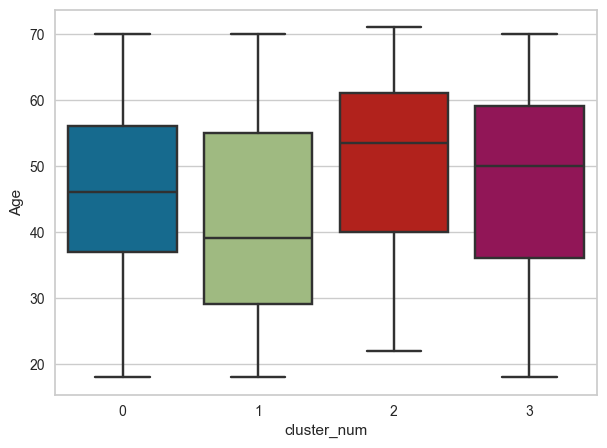

In [30]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=df);

# Selecting the Target Segment

In [31]:
# calculating the mean of 'VisitFrequency'
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.608059
1,1,2.606838
2,2,2.532967
3,3,2.804054


In [32]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,4.406593
1,1,7.128205
2,2,7.390110
3,3,4.195946


In [33]:
# calculating the mean of 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.578755
1,1,0.411681
2,2,0.516484
3,3,0.418919


In [34]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.578755,4.406593,2.608059
1,1,0.411681,7.128205,2.606838
2,2,0.516484,7.390110,2.532967
3,3,0.418919,4.195946,2.804054


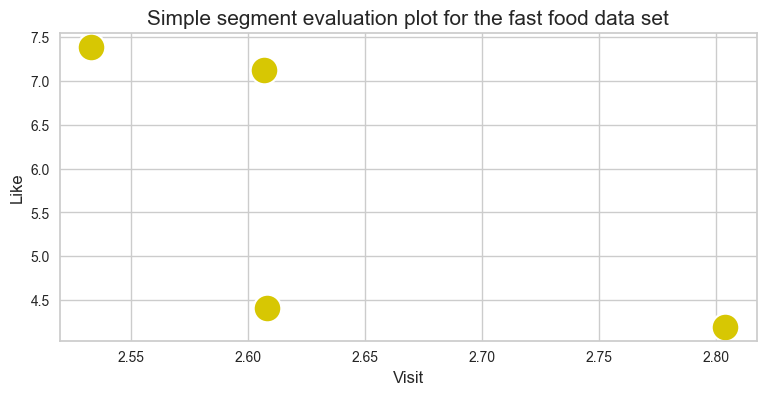

In [35]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="y")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

In [36]:

from scipy.spatial.distance import euclidean, cityblock, cosine

# Selecting numeric columns for distance calculation
numeric_cols = df.select_dtypes(include=['number'])

# Compute distance metrics between first two rows as an example
row1, row2 = numeric_cols.iloc[0], numeric_cols.iloc[1]


print("Euclidean Distance:", euclidean(row1, row2))
print("Manhattan Distance:", cityblock(row1, row2))
print("Cosine Distance:", cosine(row1, row2))


Euclidean Distance: 11.704699910719626
Manhattan Distance: 23
Cosine Distance: 0.007307857389764472


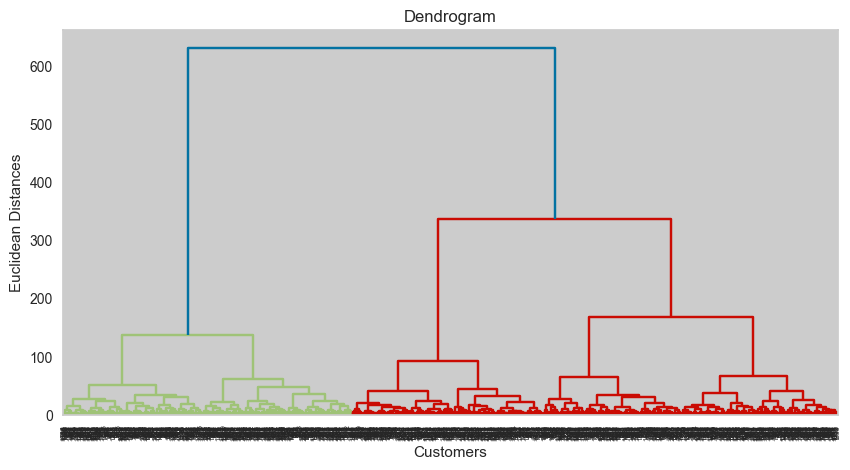

0    553
1    544
2    356
Name: HC_Cluster, dtype: int64

In [37]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(numeric_cols, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# Applying Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(numeric_cols)
df['HC_Cluster'].value_counts()


In [38]:

from sklearn.metrics import silhouette_score

# KMeans Clustering with Silhouette Score
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(numeric_cols)

sil_score = silhouette_score(numeric_cols, df['KMeans_Cluster'])
print(f"Silhouette Score for KMeans: {sil_score}")


Silhouette Score for KMeans: 0.45363635387255874


In [39]:

# Hybrid Approach: Using hierarchical clustering results as input to KMeans

# Get cluster labels from Agglomerative Clustering and add them as a feature
numeric_cols['HC_Feature'] = df['HC_Cluster']

# Apply KMeans on the enhanced dataset
kmeans_hybrid = KMeans(n_clusters=3, random_state=42)
df['Hybrid_Cluster'] = kmeans_hybrid.fit_predict(numeric_cols)

sil_score_hybrid = silhouette_score(numeric_cols, df['Hybrid_Cluster'])
print(f"Silhouette Score for Hybrid Approach: {sil_score_hybrid}")


Silhouette Score for Hybrid Approach: 0.4529871282166405


In [40]:
# Hybrid Approach: Using hierarchical clustering results as input to KMeans

# Get cluster labels from Agglomerative Clustering and add them as a feature
numeric_cols['HC_Feature'] = df['HC_Cluster']

# Apply KMeans on the enhanced dataset
kmeans_hybrid = KMeans(n_clusters=3, random_state=42)
df['Hybrid_Cluster'] = kmeans_hybrid.fit_predict(numeric_cols)

sil_score_hybrid = silhouette_score(numeric_cols, df['Hybrid_Cluster'])
print(f"Silhouette Score for Hybrid Approach: {sil_score_hybrid}")

Silhouette Score for Hybrid Approach: 0.4529871282166405


In [41]:
from sklearn.mixture import GaussianMixture

# Applying GMM
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(numeric_cols)

print(df['GMM_Cluster'].value_counts())

0    548
2    544
1    361
Name: GMM_Cluster, dtype: int64


In [42]:
from sklearn.decomposition import FactorAnalysis

# Performing Factor Analysis
fa = FactorAnalysis(n_components=3, random_state=42)
factor_scores = fa.fit_transform(numeric_cols)

# Applying KMeans on factor scores
kmeans_factor = KMeans(n_clusters=3, random_state=42)
df['Factor_Cluster'] = kmeans_factor.fit_predict(factor_scores)

print(df['Factor_Cluster'].value_counts())

1    759
0    516
2    178
Name: Factor_Cluster, dtype: int64


In [43]:
from sklearn.feature_selection import VarianceThreshold

# Selecting only binary columns
binary_cols = df.select_dtypes(include=['int', 'bool'])

# Removing low variance binary features
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(binary_cols)

# Apply KMeans on the selected binary features
kmeans_binary = KMeans(n_clusters=3, random_state=42)
df['Binary_Cluster'] = kmeans_binary.fit_predict(selected_features)

print(df['Binary_Cluster'].value_counts())

0    547
1    490
2    416
Name: Binary_Cluster, dtype: int64


In [44]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Calculating cluster indices
ch_score = calinski_harabasz_score(numeric_cols, df['KMeans_Cluster'])
db_score = davies_bouldin_score(numeric_cols, df['KMeans_Cluster'])

print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Score: {db_score}")

Calinski-Harabasz Score: 3281.1324645510936
Davies-Bouldin Score: 0.72310569980458
